# Plot Hierarchical Clustering Dendrogram
* This example plots the corresponding dendrogram of a hierarchical using AgglomerativeClustering and the dendrogram method available in scipy
* 这个示例使用 AgglomerativeClustering 绘制层次聚类的对应树状图，并使用scipy中可用的树状图方法

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram  #从Scipy 的层次聚类模块中导入dendrogram函数，用来画”树状图/系谱图“

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris

### 定义画树状图的函数
* def plot_dendrogram(model, **kwargs):
    * 定义一个函数 plot_dendrogram,输入是训练好的聚类model, **kwargs 用来把其它参数原样转发给dendrogram()函数
    * 这个函数需要做两件事：
        * 根据model 构造出"linkage matrix" (层次聚类的连接矩阵);
        * 再调用dendrogram来画树状图


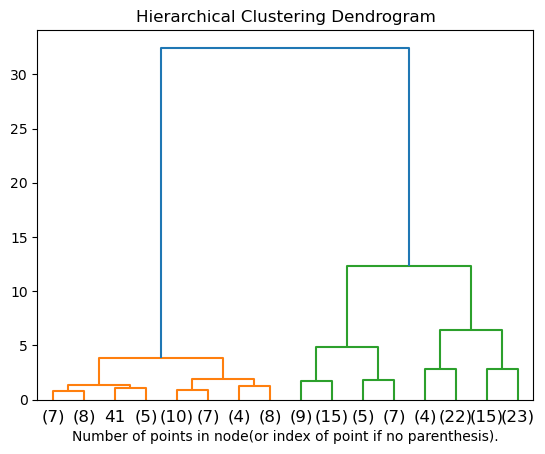

In [1]:

def plot_dendrogram(model, **kwargs):
    """create linkage matrix and then plot the dendrogram."""
    """create the counts of sample under each node"""
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    # 统计每个节点下面有多少样本

    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
# 构造linkage_matrix
# 把几个一维或二维数组按列拼接成一个二维矩阵
    linkage_matrix = np.column_stack(
        [model.children_,model.distances_,counts]
    ).astype(float)

    #Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

#setting distance_threshold=0 ensures we compute the full tree
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
#Plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node(or index of point if no parenthesis).")
plt.show()